In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

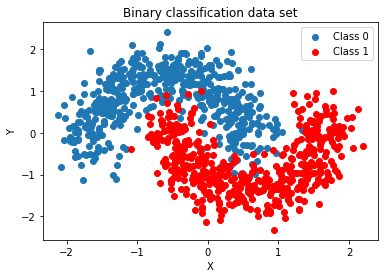

In [3]:
import matplotlib.pyplot as plt
x,y=make_moons(n_samples=1000,random_state=0,noise=0.2)
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
fig,ax=plt.subplots()
ax.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
ax.scatter(x[y==1, 0], x[y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Binary classification data set');

In [4]:
model=Sequential()
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='AdaDelta'
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [5]:
import keras.callbacks
tb_callback=keras.callbacks.TensorBoard(log_dir='./Graph/model_1'
                            ,histogram_freq=True
                           ,write_graph=True
                            ,write_images=False)
model.fit(x_train, y_train, batch_size=32, epochs=200,
          verbose=0, validation_data=(x_test, y_test),callbacks=[tb_callback])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9671855568885803
Test accuracy: 0.2240000069141388


In [6]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict(grid_2d, batch_size=32, verbose=0)

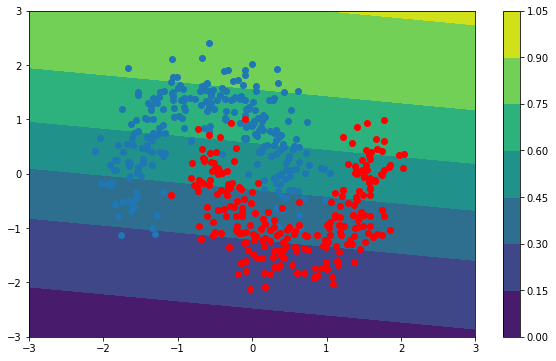

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1])
ax.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)